# Trabajo práctico 1 



**Human activity recognition**

https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones

https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/intro_ia/tree/cohorte-6/clase_2/jupyterbooks/data

**MNIST**

    from sklearn.datasets import fetch_openml
    X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)


Deben maximizarse la cantidad de operaciones vectorizadas en las implementaciones.


## Ejercicio 1 - Implementar clase PCA con numpy
**Dataset** Human activity recognition

Tomar las primeras 63 componentes principales y calcular la varianza contemplada. Realizar las operaciones internas con numpy.linalg. 

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

class PCA:
    def __init__(self,N):
        self.N = N
        self.components = None
        self.mean = None
        
    def fit(self,X):
        self.mean = np.mean(X, axis=0)
        #X = X - self.mean
        cov = np.cov(X , rowvar = False)
        autoValores , autoVectores = np.linalg.eigh(cov)
        #autoVectores = autoVectores.T
        
        idxs = np.argsort(autoValores)[::-1]
        autoVectores = autoVectores[:,idxs]
        autoValores = autoValores[idxs]
        
        
        self.components = autoVectores[:,0:self.N]
        
        return  np.cumsum( autoValores / np.sum(autoValores))
        
        
    def transf(self,X):
        #X = X - self.mean
        return np.dot(X, self.components)
    
    
    


In [2]:
PATH_DATASET = "HAPT Data Set/train"
X_train = np.loadtxt(os.path.join(PATH_DATASET, "X_train.txt"))
y_train = np.loadtxt(os.path.join(PATH_DATASET, "y_train.txt")).astype(int)

print("Estructura features del dataset: {}".format(X_train.shape))
print("Estructura de las etiquetas: {}".format(y_train.shape))

Estructura features del dataset: (7767, 561)
Estructura de las etiquetas: (7767,)


In [3]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

pca = PCA(63)
acum = pca.fit(X_scaled)
X_pca = pca.transf(X_scaled)

print(X_pca)

[[ 16.37720711  -2.36209464  -3.08104197 ...   1.53513003  -1.32648262
   -0.66125962]
 [ 15.5072942   -2.01415921   0.70146543 ...  -1.34084659   0.44124329
    0.32958579]
 [ 15.35829162  -3.14150722   1.50330429 ...  -0.94921983  -0.33774227
    0.07262715]
 ...
 [-13.45392072  10.86219474   0.19102487 ...   0.21364098  -0.43633752
    0.18592099]
 [-11.99069689  12.4583534    1.84222577 ...   0.2155783   -0.30018434
    1.28271004]
 [-12.17041683  10.71377417   2.61210118 ...  -0.02951967   1.43136127
    1.13801498]]


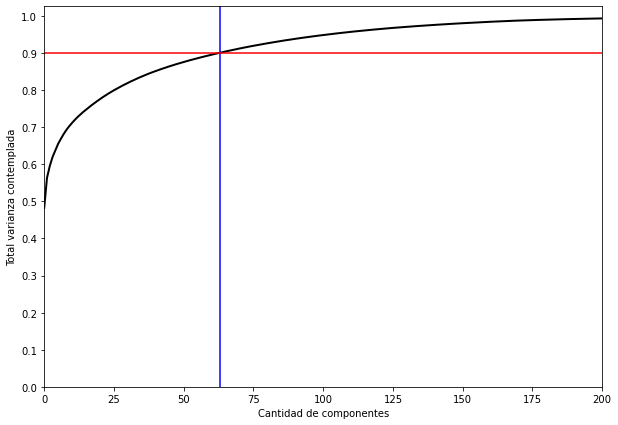

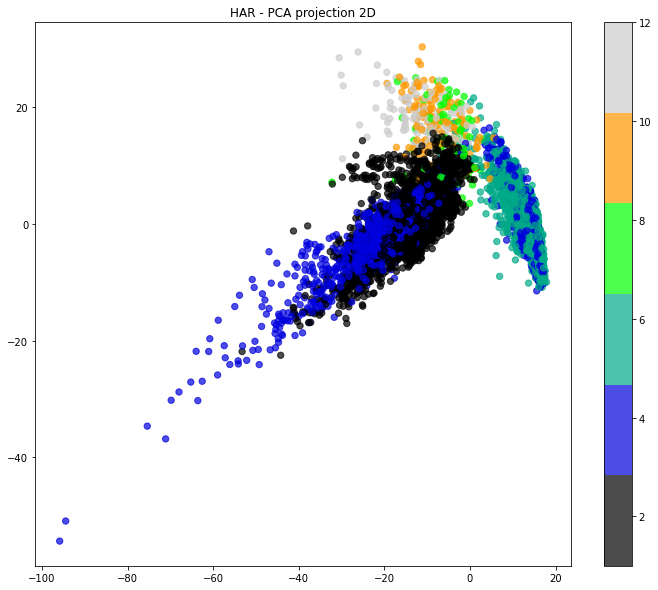

In [4]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.figure(figsize=(10,7))
plt.plot(acum, color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 200)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(63, c='b')
plt.axhline(0.9, c='r')
plt.show();

plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.rcParams['axes.grid'] = False #Evita un warning
plt.colorbar()
plt.title('HAR - PCA projection 2D');


## Ejercicio 2 - Implementar clase KMeans con numpy
**Dataset** Human activity recognition

Implementar kmeans con numpy. Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de k=2 y 6. Graficar los casos de k=2 y k=6 con las primeras dos componentes principales.

In [5]:
import random
class miKMeans:
    def __init__(self, data,n_cluster):
        self.X = data
        self.n_cluster = n_cluster
        self.cluster_centers_ = data[random.sample(range(data.shape[0]), n_cluster)]
        #print ("Centroides = ")
        #print ( self.cluster_centers_ )

        self.distancias()
        
    def distancias(self):
        centroides = self.cluster_centers_
        # Calcula la distancia entre x y cada uno de los centroides
        columnasX,filasX = self.X.shape
        columnasC,filasC = centroides.shape
        distancias = np.empty((columnasX,columnasC))
        for idx in np.arange(columnasX):
            fila = np.empty((columnasC))
            for f in np.arange(columnasC):
                resta = (self.X[idx,:] - centroides[f,:])
                dist =  np.sqrt((resta ** 2).sum())
                fila[f] = dist

            distancias[idx] = fila

        #print ("distancias")
        #print (distancias)
            
        clusters = np.empty((columnasX))
        for idx in np.arange(columnasX):
            clusters[idx] = np.argmin(distancias[idx])
        
        self.clusters = clusters
        return 

    def recalCentro(self, N):
        print (self.n_cluster)
        for j in range(N):
            for i in np.arange(self.n_cluster):
                filtro = self.X[np.where(self.clusters == i)]
                self.cluster_centers_[i] = filtro.sum(axis = 0) / filtro.shape[0]
                #print (i , filtro, self.cluster_centers_[i])

        
        #print ("Centroides = ")
        #print ( self.cluster_centers_ )

        self.distancias()

        
        return 

In [6]:
#kmeans = KMeans(n_clusters=6, n_init=100, random_state=RANDOM_STATE)
#kmeans.fit(X_pca)
#cluster_labels = kmeans.labels_


6


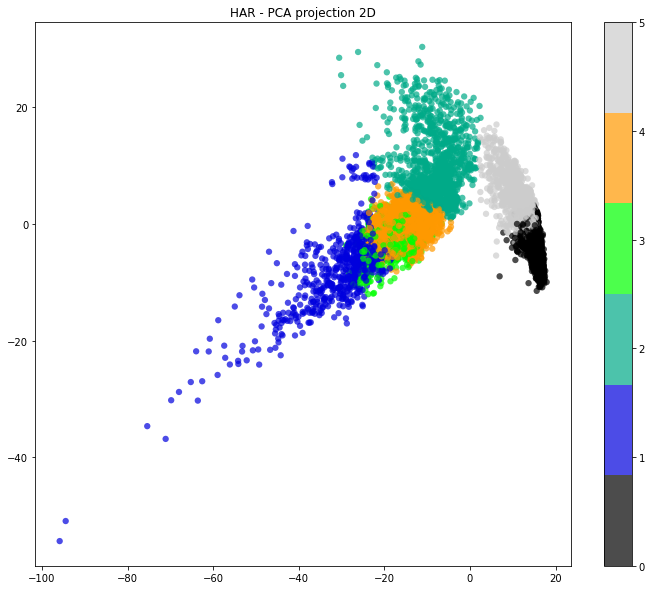

In [7]:

KM = miKMeans(X_pca,6)

KM.recalCentro(100)


# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=KM.clusters, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
#plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('HAR - PCA projection 2D');


2


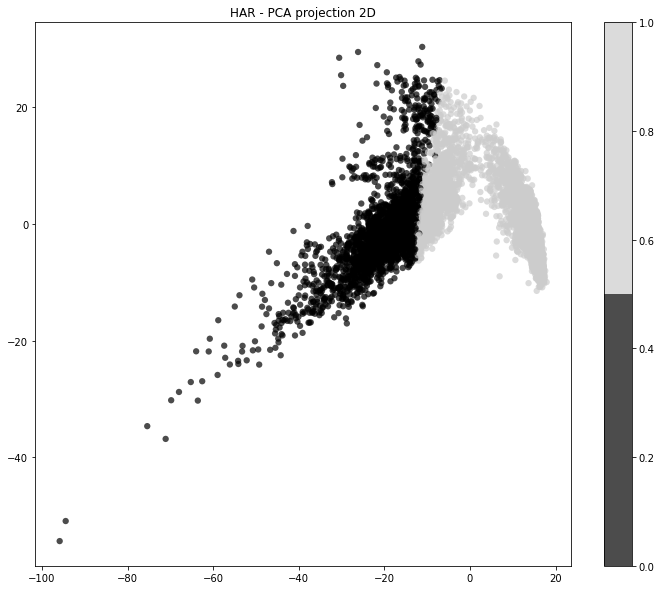

In [8]:
KM = miKMeans(X_pca,2)

KM.recalCentro(100)


# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=KM.clusters, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
#plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('HAR - PCA projection 2D');

## Ejercicio 3 - Comparar los ejercicios anteriores con lo visto en las clases

In [9]:
# not implemented

## Ejercicio 4 - PCA + KMeans

**Dataset**: MNIST

Con las implementaciones de sklearn, tomar las componentes principales que capturen el 90% de la varianza y aplicar kmeans para agrupar los dígitos en 10 clusters. Analizar los resultados. 

In [29]:
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
x_train, y_train = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)


#x_train = x_train.reshape((60000, 28*28))

In [30]:
y_train

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

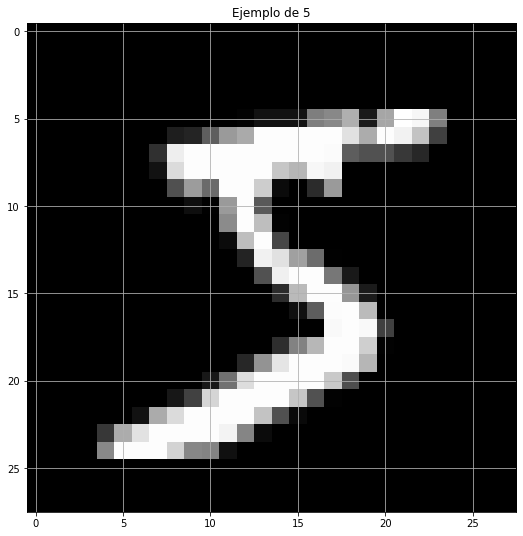

In [31]:
# Cargamos una muestra


plt.grid(True)
plt.title("Ejemplo de {}".format(y_train[0]))
plt.imshow(x_train[0, :].reshape((28, 28)), cmap='gray')

In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_train)

#pca = PCA(238)
#acum = pca.fit(X_scaled)
#X_pca = pca.transf(X_scaled)

pca = PCA(n_components=0.9, random_state=RANDOM_STATE).fit(X_scaled)
X_pca = pca.transform(X_scaled)


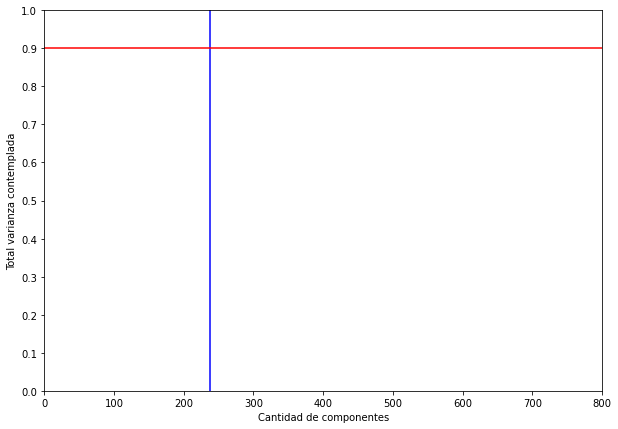

In [47]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.figure(figsize=(10,7))
#plt.plot(acum, color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 800)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(238, c='b')
plt.axhline(0.9, c='r')
plt.show();



In [48]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook

%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

RANDOM_STATE = 17


10


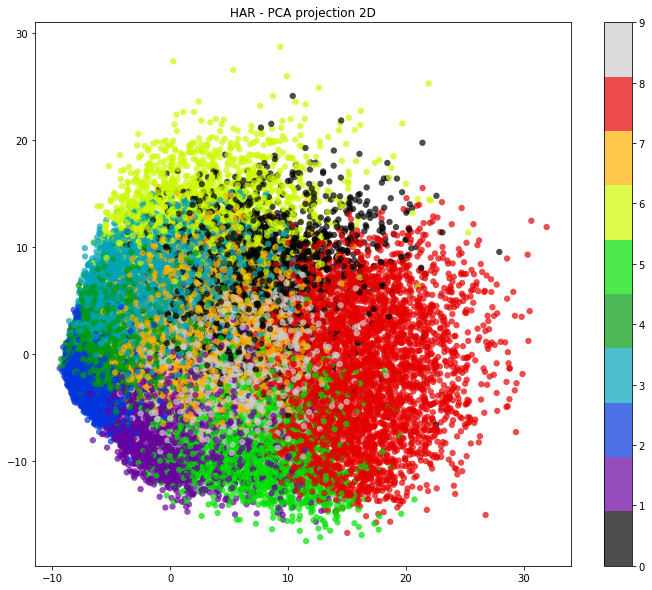

In [63]:
kmeans = KMeans(n_clusters=10, n_init=10, random_state=RANDOM_STATE)
kmeans.fit(X_pca)
clusters = kmeans.labels_

kmeans2 = KMeans(n_clusters=10, n_init=10, random_state=RANDOM_STATE)
kmeans2.fit(X_scaled)
clusters2 = kmeans2.labels_


# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
#plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('HAR - PCA projection 2D');


In [64]:
import pandas as pd
tab = pd.crosstab(y_train, clusters, margins=True)
tab.index = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'Todos']
tab.columns = ['cluster ' + str(i + 0) for i in range(10)] + ['Todos']
tab


,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7,cluster 8,cluster 9,Todos
0,115,742,35,13,7,406,11,1221,3959,394,6903
1,14,164,7630,7,5,13,1,28,0,15,7877
2,2399,102,825,191,29,1775,37,754,44,834,6990
3,635,138,590,185,94,1116,105,4177,11,90,7141
4,78,946,537,3961,769,25,320,5,55,128,6824
5,229,2725,486,307,97,153,61,2118,33,104,6313
6,453,150,561,29,1,9,5,93,268,5307,6876
7,14,133,525,1525,4123,14,926,10,20,3,7293
8,189,2167,1158,342,193,75,69,2556,47,29,6825
9,24,135,341,3454,2417,14,399,124,45,5,6958


In [65]:

tab2 = pd.crosstab(y_train, clusters2, margins=True)
tab2.index = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'Todos']
tab2.columns = ['cluster ' + str(i + 0) for i in range(10)] + ['Todos']
tab2

,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7,cluster 8,cluster 9,Todos
0,367,1436,7,9,107,12,35,3675,923,332,6903
1,161,26,5,1,13,8,7638,0,8,17,7877
2,58,715,32,40,2419,196,832,31,1846,821,6990
3,94,4086,97,106,738,200,576,10,1150,84,7141
4,936,5,745,342,72,3981,533,56,33,121,6824
5,2644,2170,86,63,247,309,456,31,207,100,6313
6,109,117,1,5,409,28,562,305,25,5315,6876
7,141,9,4078,916,15,1584,516,17,14,3,7293
8,2006,2639,188,73,204,358,1173,43,107,34,6825
9,125,124,2370,431,23,3488,332,41,19,5,6958


In [67]:

KM = miKMeans(X_scaled,10)
KM.recalCentro(1000)
clusters3 = KM.clusters

tab3 = pd.crosstab(y_train, clusters3, margins=True)
tab3.index = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'Todos']
tab3.columns = ['cluster ' + str(i + 0) for i in range(10)] + ['Todos']
tab3

10


,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7,cluster 8,cluster 9,Todos
0,71,3419,7,91,757,44,40,4,135,2335,6903
1,1426,0,3,6424,2,3,9,8,1,1,7877
2,1118,93,44,1656,166,100,189,2825,151,648,6990
3,496,35,170,3226,554,1114,26,31,37,1452,7141
4,207,5,3816,801,14,497,50,29,1275,130,6824
5,209,33,264,1655,447,2471,94,2,92,1046,6313
6,192,48,57,507,753,29,3866,126,255,1043,6876
7,116,11,3736,2441,6,343,0,8,307,325,7293
8,393,49,306,1743,272,3487,18,4,100,453,6825
9,19,10,4247,1021,17,726,0,3,771,144,6958
